# BAG Of n-grams

A bag of n-grams is a text representation model used in natural language processing (NLP) and machine learning. It involves breaking down a piece of text into contiguous sequences of n words or characters, called n-grams. The bag of n-grams model represents the text by counting the occurrences of each n-gram within the text and creating a vector that represents the frequency or presence of these n-grams.

For example, let's consider the sentence: "I love to play soccer."

If we use a bag of 2-grams (also known as bigrams), the sentence can be broken down into the following n-grams:

1. "I love"
2. "love to"
3. "to play"
4. "play soccer"

The bag of 2-grams representation would then count the occurrences of these bigrams in the text and create a vector like this:

| n-gram        | Count |
|---------------|-------|
| "I love"      | 1     |
| "love to"     | 1     |
| "to play"     | 1     |
| "play soccer" | 1     |

In this case, each bigram appears once in the sentence. The resulting vector represents the frequency or presence of each bigram, and it can be used as input for further NLP or machine learning tasks, such as text classification or sentiment analysis.

The bag of n-grams model is a simple and effective way to represent text data. It can capture some linguistic patterns and context in the text, although it does not preserve the order of the words in the original text.

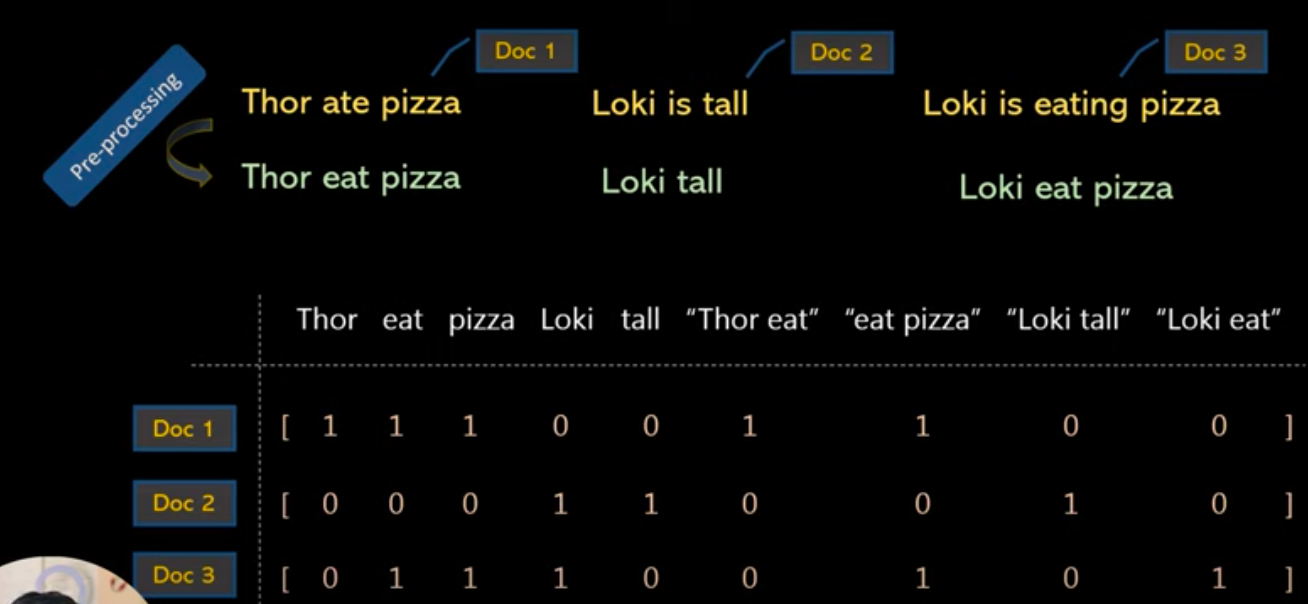

- LIMITATIONS

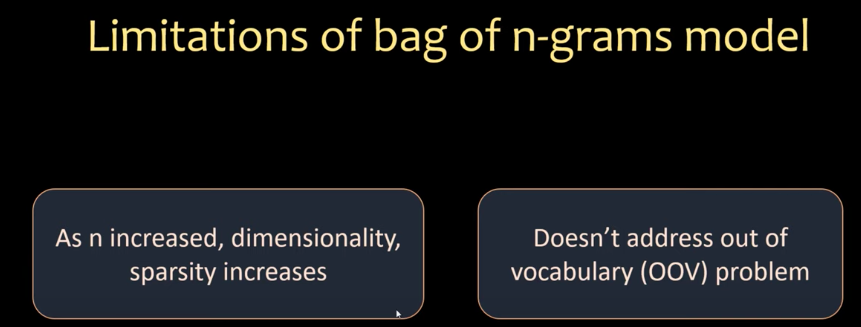

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

v= CountVectorizer(ngram_range=(1,2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 9,
 'hathodawala': 2,
 'is': 4,
 'looking': 7,
 'for': 0,
 'job': 6,
 'thor hathodawala': 10,
 'hathodawala is': 3,
 'is looking': 5,
 'looking for': 8,
 'for job': 1}

- You can generate just bi-gram using(2,2) or 1-gram to 3-gram using (1,3)

### We will take a simple collection of text documents, preprocess them to remove stop words, lemmatize etc and then generate bag of 1 grams and 2 grams from it.

In [ ]:
corpus = [
    "Thor ate pizza",
    "Loki is tall",
    "Loki is eating pizza"
]

In [ ]:
import spacy
# load english language model and create nlp object from it
nlp=spacy.load("en_core_web_sm")

def preprocess(text):
    # remove stop words and lemmatize the text
  doc=nlp(text)
  filtered_token=[]
  for token in doc:
    if token.is_stop or token.is_punct:
      continue
    else:
      filtered_token.append(token.lemma_)

  return " ".join(filtered_token)







In [ ]:
# Calling the function

preprocess("Loki is eating the pizza")

'Loki eat pizza'

In [ ]:
corpus_preprocessed=[preprocess(text) for text in corpus]
corpus_preprocessed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [ ]:
v=CountVectorizer(ngram_range=(1,2))
v.fit(corpus_preprocessed)
v.vocabulary_


{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [ ]:
v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]])

#News Category Classification Problem
Okay now that we know basics of BAG of n grams vectorizer 😎 It is the time to work on a real problem. Here we want to do a news category classification. We will use bag of n-grams and traing a machine learning model that can categorize any news into one of the following categories,

BUSINESS

SPORTS

CRIME

SCIENCE


##Dataset
Dataset Credits: https://www.kaggle.com/code/hengzheng/news-category-classifier-val-acc-0-65

This data consists of two columns.
 - Text
 - Category
Text is a news article

Category can be one of these 4:
'BUSINESS', 'SPORTS', 'CRIME', 'SCIENCE'


In [ ]:
!pip install kaggle

In [ ]:


!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:

!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d rmisra/news-category-dataset

news-category-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls

kaggle.json		       news-category-dataset.zip
News_Category_Dataset_v3.json  sample_data


In [ ]:
!unzip news-category-dataset.zip

Archive:  news-category-dataset.zip
replace News_Category_Dataset_v3.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
df=pd.read_json("News_Category_Dataset_v3.json",lines=True)
df.head()


,link,headline,category,short_description,authors,date
0,https://www.huffpost.com/entry/covid-boosters-...,Over 4 Million Americans Roll Up Sleeves For O...,U.S. NEWS,Health experts said it is too early to predict...,"Carla K. Johnson, AP",2022-09-23
1,https://www.huffpost.com/entry/american-airlin...,"American Airlines Flyer Charged, Banned For Li...",U.S. NEWS,He was subdued by passengers and crew when he ...,Mary Papenfuss,2022-09-23
2,https://www.huffpost.com/entry/funniest-tweets...,23 Of The Funniest Tweets About Cats And Dogs ...,COMEDY,"""Until you have a dog you don't understand wha...",Elyse Wanshel,2022-09-23
3,https://www.huffpost.com/entry/funniest-parent...,The Funniest Tweets From Parents This Week (Se...,PARENTING,"""Accidentally put grown-up toothpaste on my to...",Caroline Bologna,2022-09-23
4,https://www.huffpost.com/entry/amy-cooper-lose...,Woman Who Called Cops On Black Bird-Watcher Lo...,U.S. NEWS,Amy Cooper accused investment firm Franklin Te...,Nina Golgowski,2022-09-22


In [ ]:
df.category.value_counts()

POLITICS          35602
WELLNESS          17945
ENTERTAINMENT     17362
TRAVEL             9900
STYLE & BEAUTY     9814
PARENTING          8791
HEALTHY LIVING     6694
QUEER VOICES       6347
FOOD & DRINK       6340
BUSINESS           5992
COMEDY             5400
SPORTS             5077
BLACK VOICES       4583
HOME & LIVING      4320
PARENTS            3955
THE WORLDPOST      3664
WEDDINGS           3653
WOMEN              3572
CRIME              3562
IMPACT             3484
DIVORCE            3426
WORLD NEWS         3299
MEDIA              2944
WEIRD NEWS         2777
GREEN              2622
WORLDPOST          2579
RELIGION           2577
STYLE              2254
SCIENCE            2206
TECH               2104
TASTE              2096
MONEY              1756
ARTS               1509
ENVIRONMENT        1444
FIFTY              1401
GOOD NEWS          1398
U.S. NEWS          1377
ARTS & CULTURE     1339
COLLEGE            1144
LATINO VOICES      1130
CULTURE & ARTS     1074
EDUCATION       

#Filtering the rows of 'BUSINESS','SPORTS','CRIME','SCIENCE'

In [ ]:
rows_to_keep=['BUSINESS','SPORTS','CRIME','SCIENCE']
df=df[df['category'].isin(rows_to_keep)]
df.head()

,link,headline,category,short_description,authors,date
17,https://www.huffpost.com/entry/dodgers-basebal...,"Maury Wills, Base-Stealing Shortstop For Dodge...",SPORTS,"Maury Wills, who helped the Los Angeles Dodger...","Beth Harris, AP",2022-09-20
26,https://www.huffpost.com/entry/2022-wnba-final...,"Las Vegas Aces Win First WNBA Title, Chelsea G...",SPORTS,Las Vegas never had a professional sports cham...,"Pat Eaton-Robb, AP",2022-09-19
61,https://www.huffpost.com/entry/boston-marathon...,Boston Marathon To Make Race More Inclusive Fo...,SPORTS,The race's organizers say nonbinary athletes w...,Sanjana Karanth,2022-09-12
62,https://www.huffpost.com/entry/anthony-varvaro...,"Anthony Varvaro, MLB Pitcher Turned Transit Co...",SPORTS,Varvaro pitched mostly with the Atlanta Braves...,,2022-09-12
67,https://www.huffpost.com/entry/carlos-alcaraz-...,Carlos Alcaraz Wins U.S. Open For 1st Slam Tit...,SPORTS,Carlos Alcaraz defeated Casper Ruud in the U.S...,"HOWARD FENDRICH, AP",2022-09-11


In [ ]:
df.category.value_counts()

BUSINESS    5992
SPORTS      5077
CRIME       3562
SCIENCE     2206
Name: category, dtype: int64

Handle class imbalance
As you can see above, SCIENCE category has almost 1/3rd data samples compared to BUSINESS and SPORTS categories. I initially trained a model without handling the imbalanced I saw a lower f1-score for SCIENCE category. Hence we need to address this imbalanced.

In undersampling, we take a minor class and sample those many samples from other classes, this means we are not utilizing all the data samples for training and in ML world - Not using all the data for training is considered a SIN! 😵 In real life, you are advised to use a technique such as SMOTE so that you can utilize all of your dataset for the training but since this tutorial is more about bag of n-grams then class imbalance itself, I'd go with a simple technique of undersampling.

In [ ]:
min_samples=2206

df_business=df[df.category=='BUSINESS'].sample(min_samples,random_state=2022)
df_business.head()

,link,headline,category,short_description,authors,date
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17


## SImilarly adding more datasets

In [ ]:
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=2022)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=2022)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=2022)

In [ ]:
df_balanced=pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

BUSINESS    2206
SPORTS      2206
CRIME       2206
SCIENCE     2206
Name: category, dtype: int64

### Convert text category to a number

In [ ]:
df_balanced['category_num']=df_balanced['category'].map({'BUSINESS': 0,
    'SPORTS': 1,
    'CRIME': 2,
    'SCIENCE': 3})
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0


In [ ]:
from sklearn.model_selection import train_test_split

#stratify=df_balanced.category_num makes sure that eqaul number of samples are taken from all the classes in train and test

X_train,X_test,y_train,y_test=train_test_split(df_balanced.headline,df_balanced.category_num,test_size=0.2,random_state=2022,stratify=df_balanced.category_num)

In [ ]:
X_train.shape

(7059,)

In [ ]:
y_train.shape

(7059,)

In [ ]:
y_train.value_counts()

2    1765
0    1765
3    1765
1    1764
Name: category_num, dtype: int64

In [ ]:
X_train.head()

116483    Major Police Group: Mandated Treatment Can Hel...
99023     Hyper-Masculinity, Twin Peaks, & Gendered Viol...
138592                  The Inherent Creepiness of LinkedIn
173568            Project Seeks To Build Map Of Human Brain
73233     Man Suspected Of Shooting Idaho Pastor Who Led...
Name: headline, dtype: object

In [ ]:
y_test.value_counts()

1    442
3    441
0    441
2    441
Name: category_num, dtype: int64

#Attempt 1 : Use 1-gram which is nothing but a Bag Of Words (BOW) model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range = (1, 1))),
          ('Multi NB',MultinomialNB())
          ])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       441
           1       0.87      0.83      0.85       442
           2       0.84      0.88      0.86       441
           3       0.88      0.83      0.85       441

    accuracy                           0.84      1765
   macro avg       0.85      0.84      0.84      1765
weighted avg       0.85      0.84      0.84      1765



# Attempt 2 : Use 1-gram and bigrams

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf=Pipeline([('vectorizer_bow',CountVectorizer(ngram_range = (1, 2))),
          ('Multi NB',MultinomialNB())
          ])
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       441
           1       0.87      0.84      0.86       442
           2       0.84      0.89      0.86       441
           3       0.87      0.83      0.85       441

    accuracy                           0.85      1765
   macro avg       0.85      0.85      0.85      1765
weighted avg       0.85      0.85      0.85      1765



# Attempt 3 : Use 1-gram to trigrams

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_1_3_grams', CountVectorizer(ngram_range = (1, 3))),        #using the ngram_range parameter
     ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.80       441
           1       0.87      0.84      0.85       442
           2       0.83      0.89      0.86       441
           3       0.87      0.83      0.85       441

    accuracy                           0.84      1765
   macro avg       0.84      0.84      0.84      1765
weighted avg       0.84      0.84      0.84      1765



# Using 1-gram to trigrams to do some prediction

In [ ]:
X_test[:5]

209491    Thomas Edison Voted Most Iconic Inventor In U....
196530          Three Big Questions for the Greek Elections
116469       Documentary Star Fights Molestation Conviction
208860    Football Statistics Suggest Teams Should Go Fo...
121756    Actually, Burger King Has Been Trying To Dodge...
Name: headline, dtype: object

In [ ]:
y_test[:5]

209491    3
196530    0
116469    2
208860    3
121756    0
Name: category_num, dtype: int64

In [ ]:
y_pred[:5]

array([3, 0, 1, 1, 0])

### By comparing y_test and y_pred we get to see that out of 5 predictions 3 were correct.

# Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [ ]:
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0


In [ ]:
df_balanced['preprocessed_test']=df_balanced.headline.apply(preprocess)

In [ ]:
df_balanced.head()

,link,headline,category,short_description,authors,date,category_num,preprocessed_test
181516,https://www.huffingtonpost.com/entry/entrepren...,Entrepreneurism: Lots of Little Traumas and No...,BUSINESS,"I loved my years in corporate America, which I...","Liz Ryan, Contributor\nSpeaker, writer, sopran...",2012-11-25,0,entrepreneurism lot little Traumas Big Ones
58552,https://www.huffingtonpost.com/entry/tesla-fas...,Tesla Just Unveiled The Quickest Car You Can A...,BUSINESS,A new battery upgrade extends the range of the...,"Alexandria Sage, Reuters",2016-08-23,0,Tesla unveil Quickest car actually buy
155102,https://www.huffingtonpost.com/entry/workers-p...,90 Percent Of Employers Tie Workers' Pay To Co...,BUSINESS,Caterpillar will not break any profit records ...,"Reuters, Reuters",2013-09-01,0,90 percent Employers tie Workers pay Company p...
71725,https://www.huffingtonpost.com/entry/us-tax-ha...,One Of Ben Carson's Craziest Ideas Is Coming True,BUSINESS,The U.S. is the world's hottest new tax haven.,Ben Walsh,2016-03-26,0,Ben Carson Craziest Ideas come true
80455,https://www.huffingtonpost.comhttp://www.bloom...,CEO Who Price Gouged HIV Drug Arrested For Sec...,BUSINESS,"A boyish drug company entrepreneur, who rocket...",,2015-12-17,0,ceo price Gouged HIV Drug arrest Securities Fr...


## Build a model with pre processed text

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_test,
    df_balanced.category_num,
    test_size=0.2, # 20% samples will go to test dataset
    random_state=2022,
    stratify=df_balanced.category_num
)

In [ ]:
print(X_train.shape)
X_train.head()

(7059,)


116483    Major Police Group Mandated Treatment help men...
99023        Hyper Masculinity Twin Peaks Gendered violence
138592                         Inherent Creepiness LinkedIn
173568                   project seek build Map Human Brain
73233     Man Suspected Shooting Idaho Pastor lead Praye...
Name: preprocessed_test, dtype: object

In [ ]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81       441
           1       0.86      0.84      0.85       442
           2       0.82      0.90      0.86       441
           3       0.88      0.83      0.85       441

    accuracy                           0.84      1765
   macro avg       0.85      0.84      0.84      1765
weighted avg       0.85      0.84      0.84      1765



- If you compare above classification report for (1,2) gram with the one from unprocessed text, you will find some improvement in the model that uses preprocessed cleaned up text.
- Hence we can conclude that for this particular problem using preprocessing (removing stop words, lemmatization) is improving the performance of the model

# Plot confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[352,  31,  32,  26],
       [ 19, 373,  35,  15],
       [ 24,   9, 399,   9],
       [ 31,  22,  22, 366]])

Text(95.72222222222221, 0.5, 'Truth')

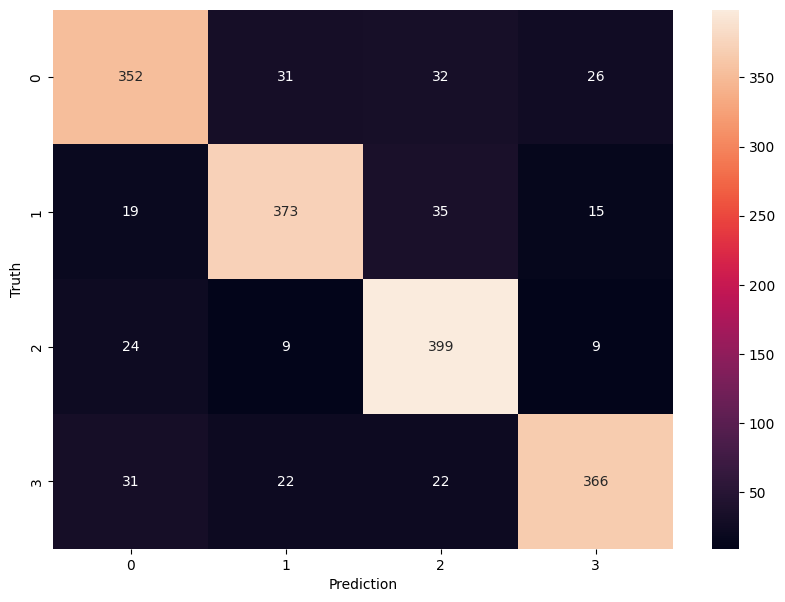

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

# Link to exercise

https://github.com/codebasics/nlp-tutorials/blob/main/11_bag_of_n_grams/bag_of_n_grams_exercise_solutions.ipynb